In [1]:
import pandas
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn


In [2]:
# read in red and white data
# we'll focus on the reds dataset

wd = pandas.read_csv('winequality-white.csv', sep=";")
rd = pandas.read_csv('winequality-red.csv', sep=";")

rd[1:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#sort by quality
rd = rd.sort_values(by='quality')

In [5]:
rd.sort_values(by='quality').head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1478,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3
832,10.4,0.440,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
899,8.3,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3
459,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3


In [7]:
# have a look at the basic stats
rd.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
# closer look at variance
rd.std()

fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
dtype: float64

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

In [185]:
rd[1590:1591]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1202,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8


In [116]:
# feature set
list(rd)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

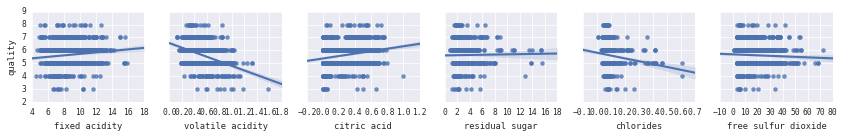

In [117]:
# pairplot against wine quality

sb.pairplot(rd, x_vars=['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 ], y_vars='quality', kind='reg', size=2, aspect=1)

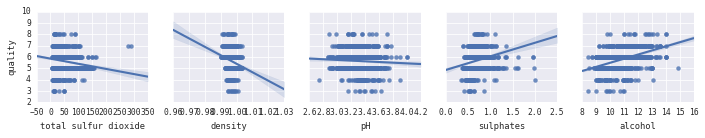

In [73]:
# pairplot against wine quality

sb.pairplot(rd, x_vars=['total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
], y_vars='quality', kind='reg', size=2, aspect=1)

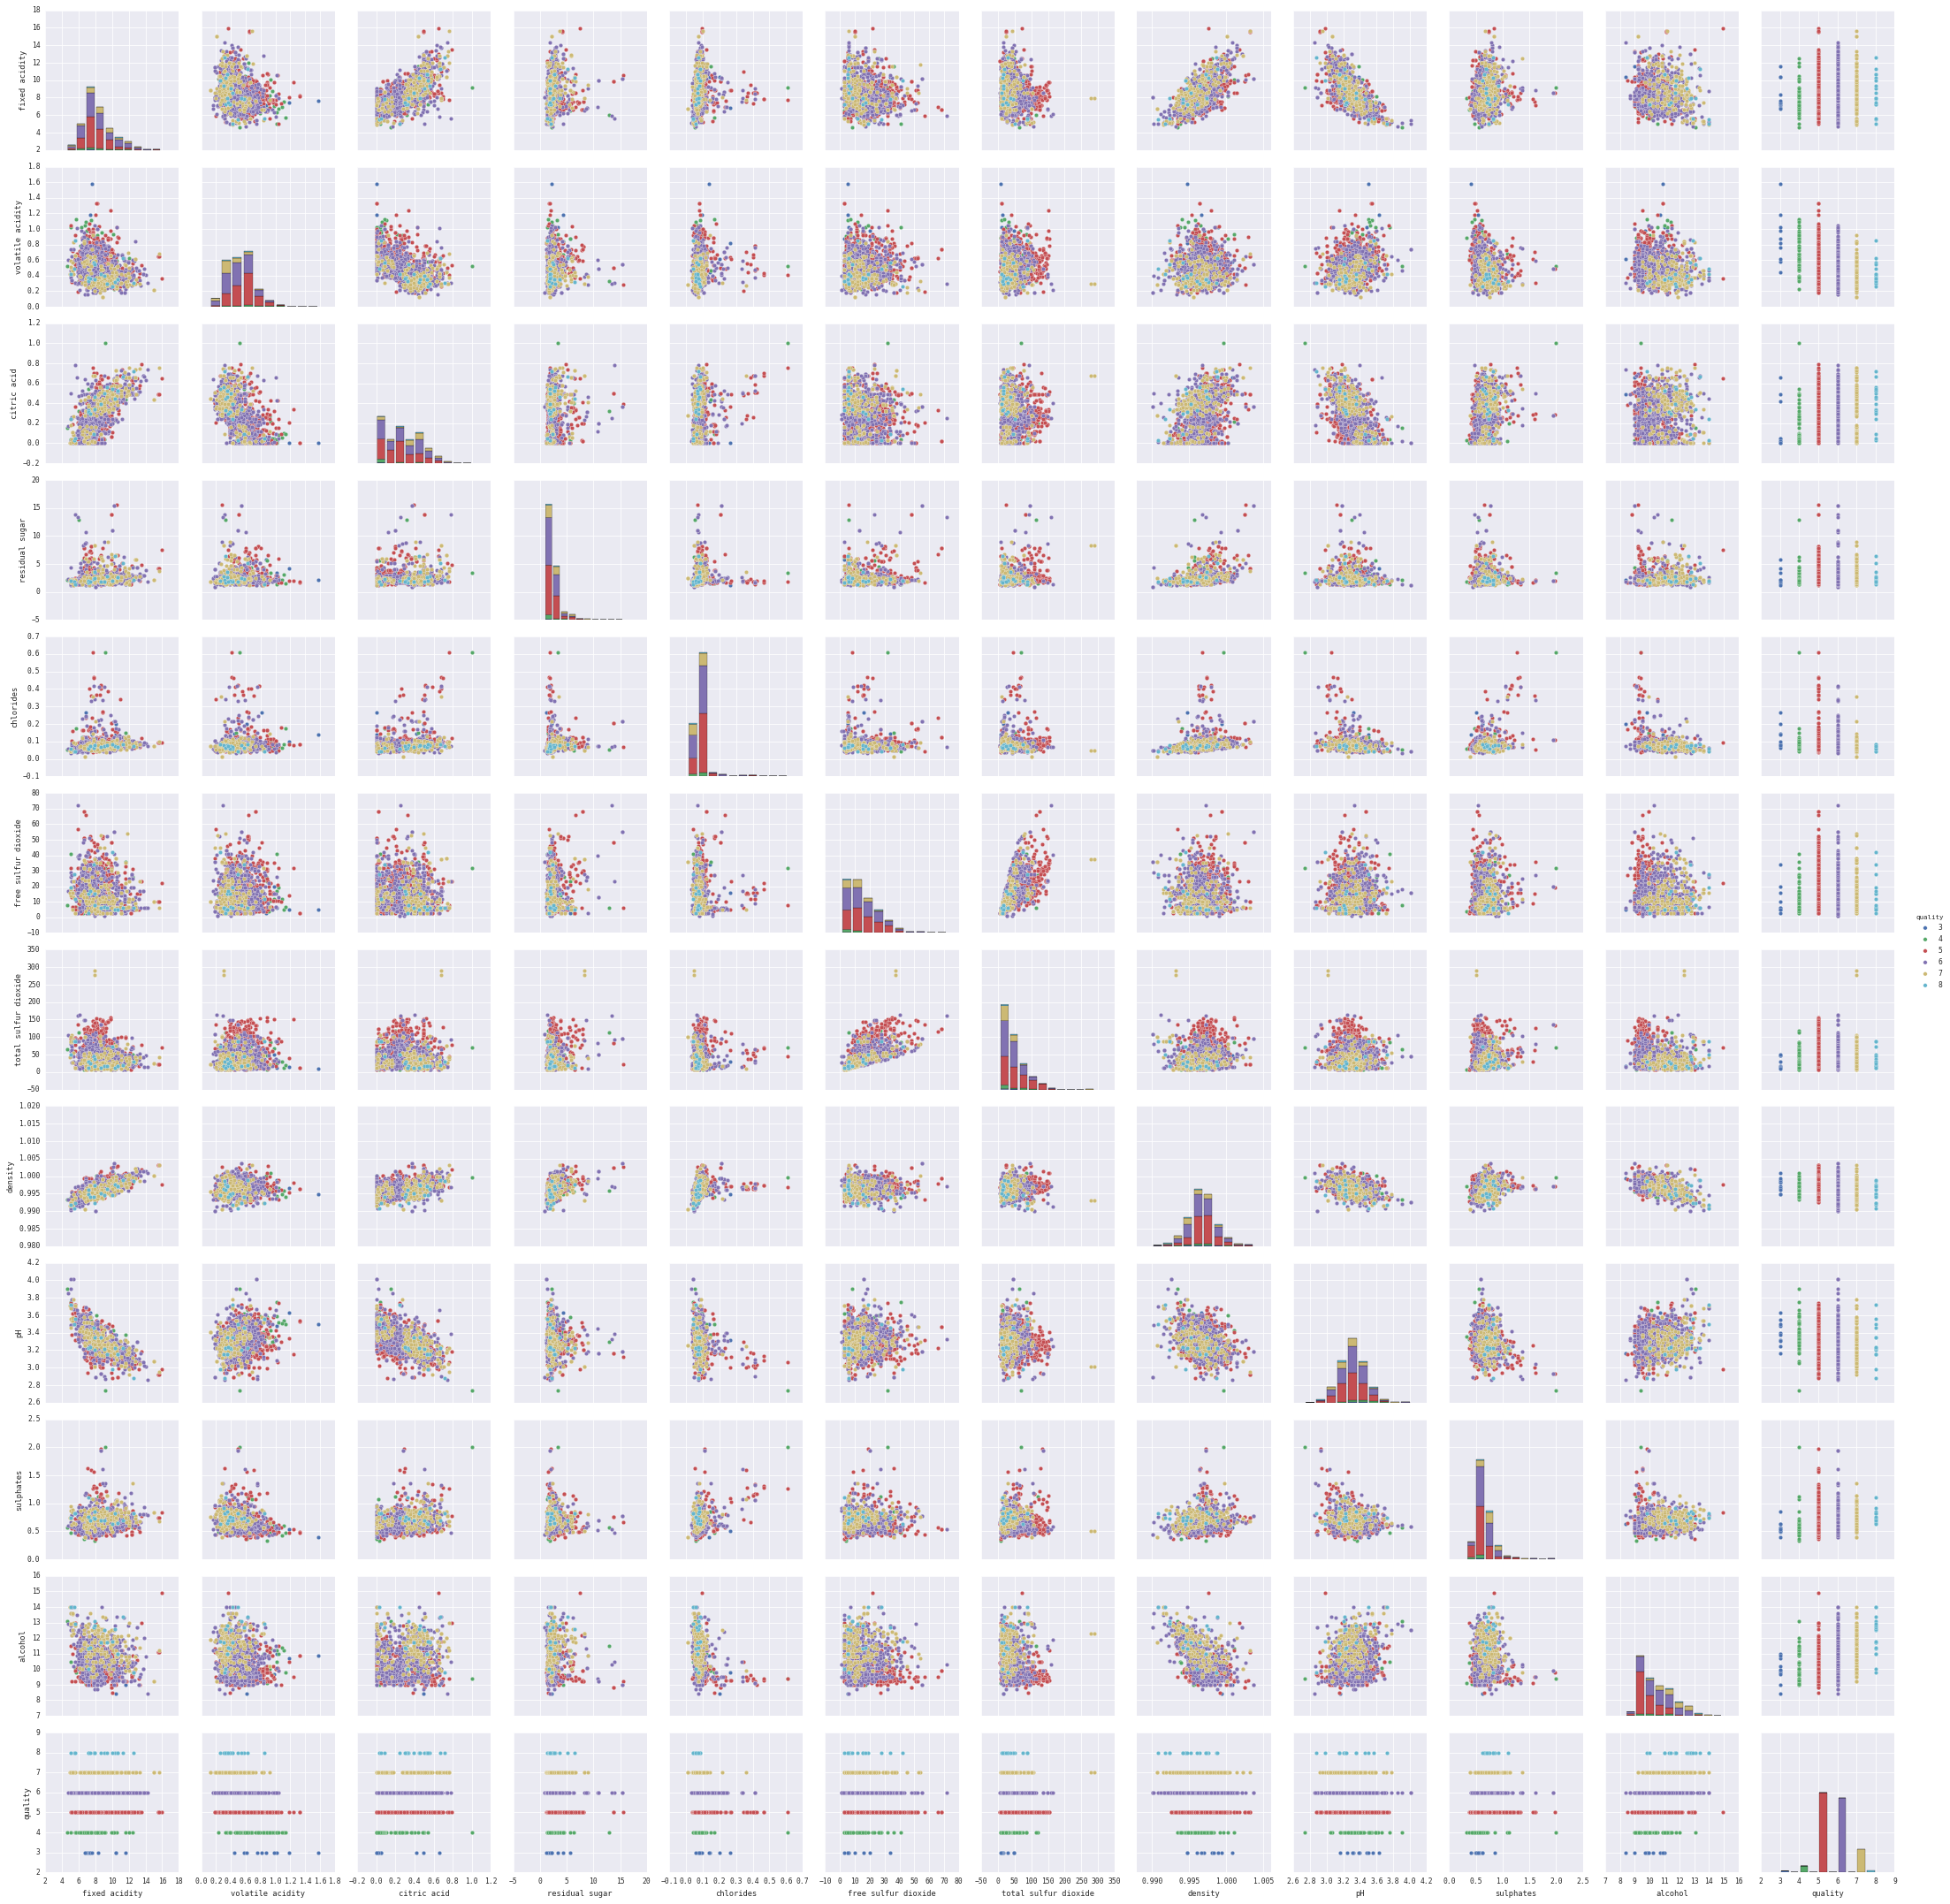

In [16]:
# exploring...

sb.pairplot(rd, hue='quality')

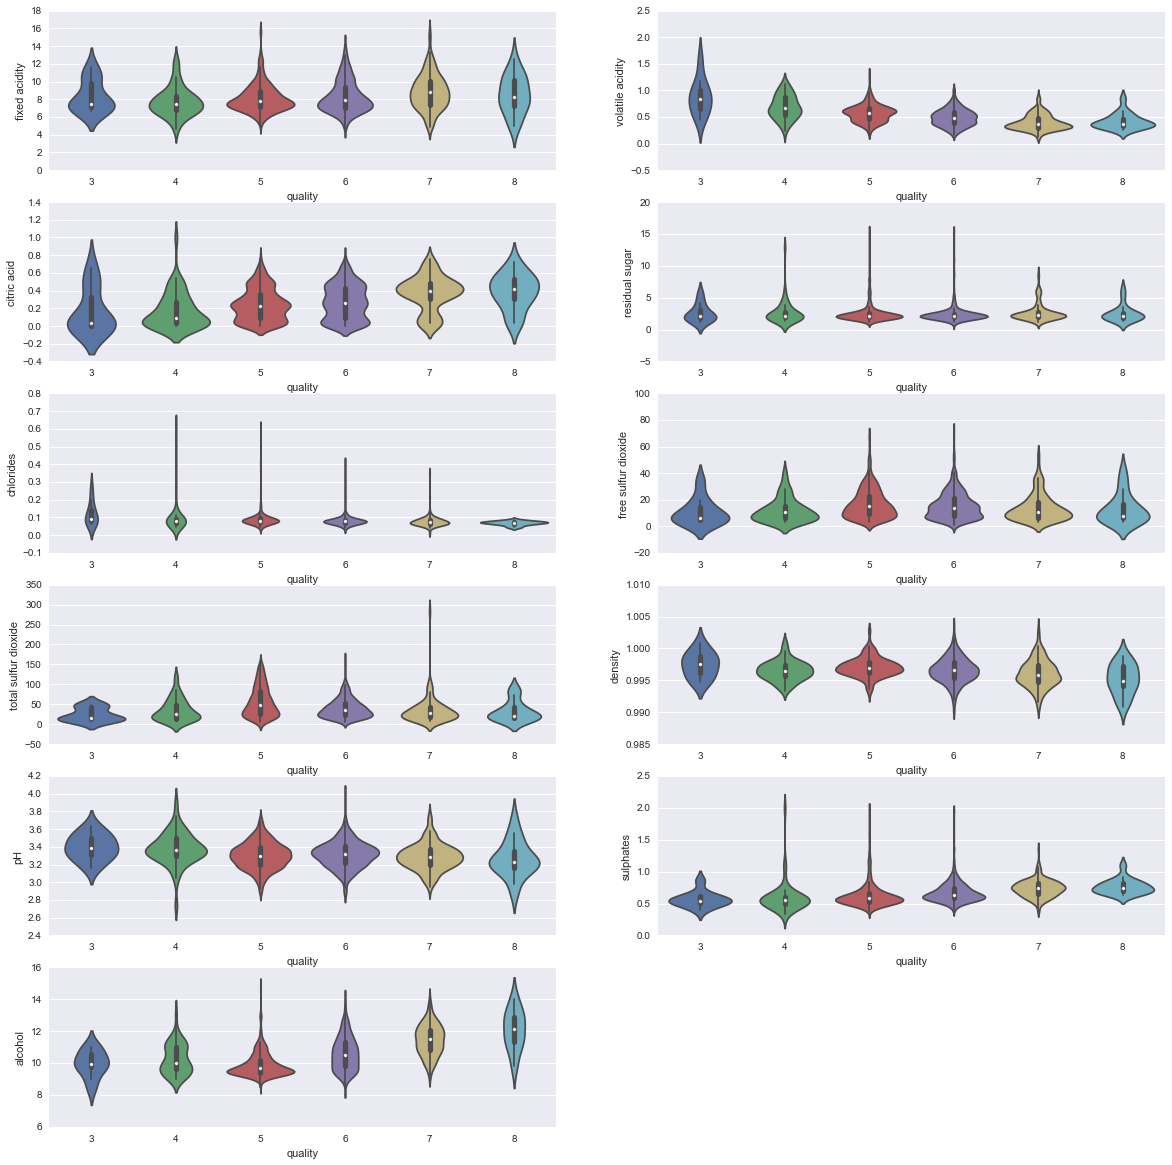

In [11]:
# exploring...

plt.figure(figsize=(20, 20))

for column_index, column in enumerate(rd.columns):
    if column == 'quality':
        continue
    plt.subplot(6, 2, column_index + 1)
    sb.violinplot(x='quality', y=column, data=rd)

KeyError: 'Level network must be same as name (None)'

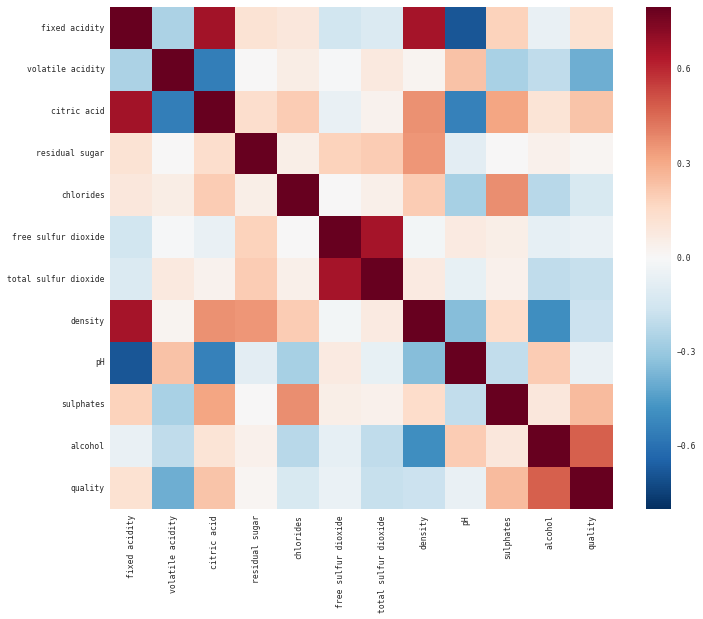

In [12]:
#exploring

corrmat = rd.corr()
sb.set(context="paper", font="monospace")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sb.heatmap(corrmat, vmax=.8, square=True)

# Use matplotlib directly to emphasize known networks
networks = corrmat.columns.get_level_values("network")
for i, network in enumerate(networks):
    if i and network != networks[i - 1]:
        ax.axhline(len(networks) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()

In [170]:
# split into train and target. We'll use sklearn k-folds, so won't bother splitting off a test set or shuffling

import numpy as np

y = rd['quality']
X = rd.drop('quality', 1)
X = X.as_matrix()
y = y.as_matrix()
X[2]

array([  8.3    ,   1.02   ,   0.02   ,   3.4    ,   0.084  ,   6.     ,
        11.     ,   0.99892,   3.48   ,   0.49   ,  11.     ])

In [171]:
#quick check

print "Target vector:",y.shape
print "Feature matrix",X.shape

Target vector: (1599,)
Feature matrix (1599, 11)


In [120]:
# kfolds on linear regression

from sklearn import cross_validation

num_folds = 10
num_instances = len(X)
seed = 6
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle=True)

model = sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False)

results = cross_validation.cross_val_score(model, X, y, cv=kfold)
print results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

[ 0.40004144  0.26456988  0.33977338  0.40538395  0.21395995  0.29541643
  0.41695819  0.34149024  0.33511432  0.40965153]


Accuracy: 34.224% (+/- 6.496%)


In [40]:
# startified k folds on linear regression

num_folds = 10
num_instances = len(X)
seed = 6
stratifiedkfold = cross_validation.StratifiedKFold(y, n_folds=num_folds, random_state=seed, shuffle=True)

results = cross_validation.cross_val_score(model, X, y, cv=stratifiedkfold)
print results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

[ 0.363156    0.38836658  0.34987593  0.37813357  0.30848292  0.24174686
  0.41667752  0.26655427  0.44973871  0.34246879]
Accuracy: 35.052% (+/- 6.107%)


In [121]:
# k folds on ridge regression

num_folds = 10
num_instances = len(X)
seed = 6
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle=True)

model = sklearn.linear_model.RidgeCV(normalize=False)

results = cross_validation.cross_val_score(model, X, y, cv=kfold)
print results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

[ 0.40252252  0.26411366  0.33831344  0.4082061   0.2150958   0.29802188
  0.4171128   0.34021428  0.33575812  0.41007839]


Accuracy: 34.294% (+/- 6.517%)


In [44]:
model = sklearn.linear_model.LinearRegression(normalize=False)
model = model.fit(X, y)

# check the accuracy on the training set
print model.score(X, y)
model.predict( [  11.2,0.9,0.03,1.9,0.075,17.0,60.0,0.9980,3.16,1,9.8    ]  )
print model.get_params(deep=True)
print model.predict

0.360551703039
{'copy_X': True, 'normalize': False, 'n_jobs': 1, 'fit_intercept': True}
<bound method LinearRegression.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


/Users/nickryan/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [122]:
# try hand-selecting features, label as X2

X2 = rd.drop(['quality','residual sugar','chlorides','free sulfur dioxide','pH'],1)

num_folds = 10
num_instances = len(X2)
seed = 6
stratifiedkfold = cross_validation.StratifiedKFold(y, n_folds=num_folds, random_state=seed, shuffle=True)

model = sklearn.linear_model.RidgeCV(normalize=False)

#scoring
results = cross_validation.cross_val_score(model, X2, y, cv=stratifiedkfold)
print "Fold scores:", results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

#feature coefficients
model = model.fit(X, y)
print '\n'
print "Parameter coefficients:", zip(list(X2),model.coef_)


Fold scores: [ 0.35546308  0.36992146  0.32875545  0.35525358  0.32406225  0.25699643
  0.43277408  0.23598666  0.44571807  0.3296179 ]


Accuracy: 34.345% (+/- 6.263%)


Parameter coefficients: [('fixed acidity', 0.0090558882787661332), ('volatile acidity', -1.0990285025618824), ('citric acid', -0.18701387712739148), ('total sulfur dioxide', 0.0088428346566900018), ('density', -1.8295899474397235), ('sulphates', 0.0045051932938804384), ('alcohol', -0.0032971926225400239)]


In [184]:
y.size

1599

In [135]:
# lasso with our smaller, hand-picked feature set (X2)

num_folds = 10
num_instances = len(X2)
seed = 6
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle=True)

model = sklearn.linear_model.Lasso(alpha=.01)

results = cross_validation.cross_val_score(model, X2, y, cv=kfold)
print results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

[ 0.3842335   0.27007285  0.32142699  0.39591393  0.17649335  0.30514304
  0.39882258  0.29790053  0.3030387   0.39716977]


Accuracy: 32.502% (+/- 6.774%)


In [195]:
# elastic net

num_folds = 10
num_instances = len(X2)
seed = 6
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle=True)

model = sklearn.linear_model.ElasticNet(alpha=.01, l1_ratio=0.5)

results = cross_validation.cross_val_score(model, X2, y, cv=kfold)
print results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

[ 0.39029067  0.26653497  0.32207829  0.39905768  0.17944594  0.30625075
  0.39829292  0.30137505  0.30886037  0.4048102 ]


Accuracy: 32.770% (+/- 6.870%)


In [156]:
# SVM regression

num_folds = 10
num_instances = len(X)
seed = 6
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle=True)

model = sklearn.svm.SVR(degree=5)

results = cross_validation.cross_val_score(model, X, y, cv=kfold)
print results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

[ 0.33293728  0.28581133  0.29439838  0.19963908  0.18748356  0.23706821
  0.34356623  0.22762008  0.339481    0.31929866]


Accuracy: 27.673% (+/- 5.627%)


In [159]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import RadiusNeighborsRegressor
neigh = RadiusNeighborsRegressor(radius=1.0)
neigh.fit(X, y) 
#RadiusNeighborsRegressor(...)
print(neigh.predict([[1.5]]))

[ 0.5]


In [172]:
X.shape

(1599, 11)

In [198]:
# k-nearest neighbors regression, we happen to have labels that can be treated as continous (open set (1,10)) 
# or discrete (integer score of [1..10])

num_folds = 10
num_instances = len(X)
seed = 6
#kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle=True)

model = sklearn.neighbors.RadiusNeighborsRegressor()
model.fit(X, y)
# actual score of 8
print "Prediction on an 8:",(model.predict(  [8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7]   ))
print '\n'
print "Prediction on an 6:",(model.predict(  [7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8]   ))
print '\n'
print "Score:",(model.score(X,y))


#results = cross_validation.cross_val_score(model, X, y, cv=kfold)
#print results
#print '\n'
#print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)



Prediction on an 8: [ 7.33333333]


Prediction on an 6: [ 5.]


Score: 0.964923450763


/Users/nickryan/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/nickryan/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
